Libraries

In [ ]:
!pip install tensorflowjs

In [ ]:
!pip install TensorFlow==2.15.0
!pip install tensorflow-decision-forests==1.8.1

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: TensorFlow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency re

In [ ]:
import pandas as pd
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np
import signal
import matplotlib.pyplot as plt
import tensorflow as tf

Importing the Data

In [ ]:
import tensorflowjs as tfjs
print(tfjs.__version__)

4.20.0


In [ ]:
# Load the dataset
data = pd.read_csv('datapadi.csv')

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

Pre-Processing

In [ ]:
# Preprocess the input data
data['question'] = data['question'].apply(lambda wrd: [ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['question'] = data['question'].apply(lambda wrd: ''.join(wrd))

In [ ]:
# Tokenize the data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['question'])
train = tokenizer.texts_to_sequences(data['question'])

In [ ]:
# Apply padding
x_train = pad_sequences(train)

In [ ]:
# Encode the outputs
le = LabelEncoder()
y_train = le.fit_transform(data['answer'])

In [ ]:
# Define model parameters
input_shape = x_train.shape[1]
vocabulary = len(tokenizer.word_index)
output_length = le.classes_.shape[0]

Neural Network

In [ ]:
# Create the model
input_tensor = Input(shape=(input_shape,), name='input_layer')
x = Embedding(vocabulary + 1, 10, name='embedding_layer')(input_tensor)
x = LSTM(18, return_sequences=True, name='lstm_layer')(x)
x = Flatten(name='flatten_layer')(x)
predictions = Dense(output_length, activation="softmax", name='output_layer')(x)

In [ ]:
model = Model(inputs=input_tensor, outputs=predictions, name='chatbot_model')

In [ ]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
train = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 3.4661 - accuracy: 0.0312
Epoch 2/200
1/1 [==============================] - 0s 18ms/step - loss: 3.4644 - accuracy: 0.0312
Epoch 3/200
1/1 [==============================] - 0s 19ms/step - loss: 3.4627 - accuracy: 0.0625
Epoch 4/200
1/1 [==============================] - 0s 20ms/step - loss: 3.4610 - accuracy: 0.0312
Epoch 5/200
1/1 [==============================] - 0s 18ms/step - loss: 3.4592 - accuracy: 0.0625
Epoch 6/200
1/1 [==============================] - 0s 19ms/step - loss: 3.4575 - accuracy: 0.0938
Epoch 7/200
1/1 [==============================] - 0s 18ms/step - loss: 3.4557 - accuracy: 0.1562
Epoch 8/200
1/1 [==============================] - 0s 18ms/step - loss: 3.4538 - accuracy: 0.2500
Epoch 9/200
1/1 [==============================] - 0s 17ms/step - loss: 3.4518 - accuracy: 0.3438
Epoch 10/200
1/1 [==============================] - 0s 19ms/step - loss: 3.4498 - accuracy: 0.3438
Epoch 11/200
1/1 [===

In [ ]:
# Clear the session
tf.keras.backend.clear_session()

Model Analysis

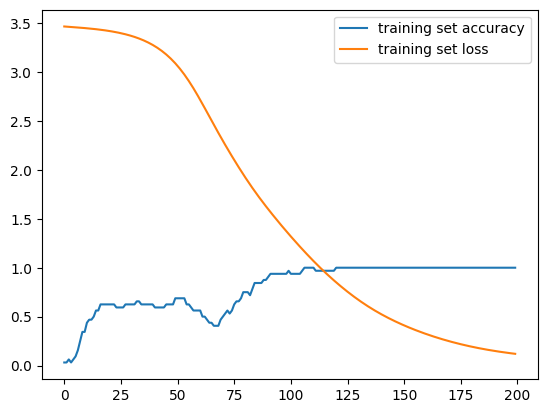

In [ ]:
# Plot model accuracy
plt.plot(train.history['accuracy'], label='training set accuracy')
plt.plot(train.history['loss'], label='training set loss')
plt.legend()
plt.show()

Testing

In [ ]:
# Define a list of goodbye phrases
goodbye_phrases = ["bye", "goodbye", "see you later", "adios", "catch you later", "thank you", "thanks"]

In [ ]:
# Function to handle timeout
def handler(signum, frame):
    raise TimeoutError

# Set the signal handler for SIGALRM
signal.signal(signal.SIGALRM, handler)

<Handlers.SIG_DFL: 0>

In [ ]:
# Chatting
while True:
    try:
        # Set the alarm for 60 seconds
        signal.alarm(60)
        user_input = input("You: ")
        signal.alarm(0)  # Disable the alarm

        texts_p = []

        # Removing punctuation and converting to lowercase
        processed_input = [letters.lower() for letters in user_input if letters not in string.punctuation]
        processed_input = ''.join(processed_input)
        texts_p.append(processed_input)

        # Check if the input is a goodbye phrase
        if any(phrase in processed_input for phrase in goodbye_phrases):
            print("Sobat Padi: Goodbye!")
            break

        # Tokenizing and padding
        prediction_input = tokenizer.texts_to_sequences(texts_p)
        prediction_input = np.array(prediction_input).reshape(-1)
        prediction_input = pad_sequences([prediction_input], input_shape)

        # Getting output from the model
        output = model.predict(prediction_input)
        output = output.argmax()

        # Finding the right tag and predicting
        response = le.inverse_transform([output])[0]
        print("Sobat Padi: ", response)

    except TimeoutError:
        print("\nNo response detected. Exiting the chat...")
        break

You: thanks
Sobat Padi: Goodbye!


In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'models')

import shutil
# Lokasi folder yang ingin Anda kompres
folder_path = '/content/models'

# Lokasi tempat menyimpan file ZIP
zip_path = '/content/models.zip'

# Kompres folder menjadi file ZIP
shutil.make_archive('/content/models', 'zip', folder_path)

# Lokasi file ZIP yang ingin diunggah
zip_file = '/content/models.zip'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
